# Chart: Visualizing Loss Gradients in Parameter Space


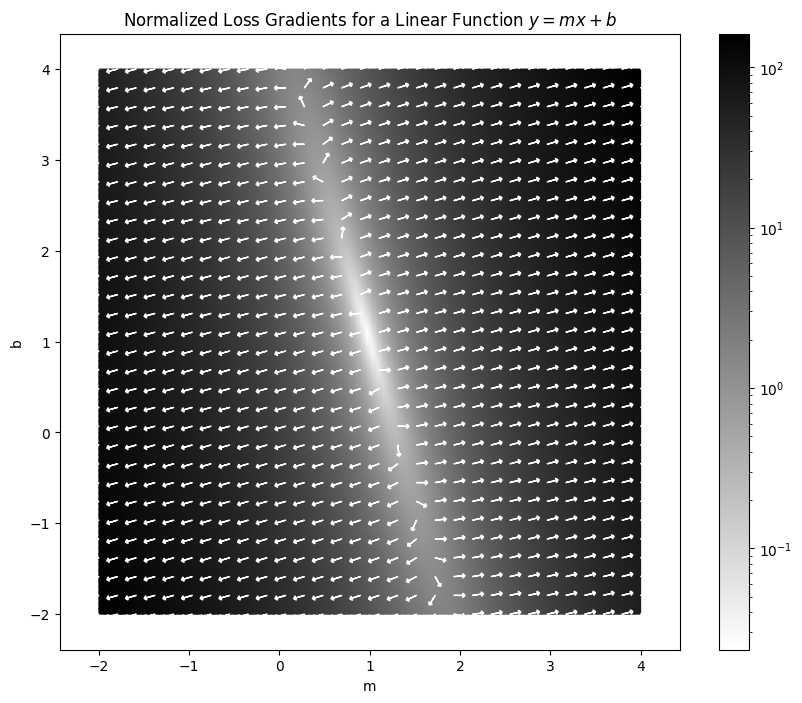

In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np

X = np.array([1, 2, 3, 4, 5])
Y = np.array([1.9, 3.3, 3.9, 5.05, 5.9])

m_optimal = 1
b_optimal = 1

m_delta = 3
b_delta = 3
sample_m_values = np.linspace(m_optimal-m_delta, m_optimal+m_delta, 100)
sample_b_values = np.linspace(b_optimal-b_delta, b_optimal+b_delta, 100)

sample_ms, sample_bs = np.meshgrid(sample_m_values, sample_b_values)
sample_ms = sample_ms.reshape(-1, 1)
sample_bs = sample_bs.reshape(-1, 1)

def calculate_loss(m, b):
    return np.mean((Y - (m * X + b))**2)

l2_losses = [calculate_loss(m, b) for (m, b) in zip(sample_ms, sample_bs)]
l2_losses = np.array(l2_losses).reshape(len(sample_m_values), len(sample_b_values))

plt.figure(figsize=(10, 8))
plt.pcolormesh(sample_m_values,
            sample_b_values,
            l2_losses,
            cmap="binary",
            norm="log",
            shading='gouraud')
plt.colorbar()
plt.title("Normalized Loss Gradients for a Linear Function $y=mx+b$")
plt.xlabel("m")
plt.ylabel("b")

epsilon = 0.001
for m in np.linspace(m_optimal - m_delta, m_optimal + m_delta, 30):
    for b in np.linspace(b_optimal - b_delta, b_optimal + b_delta, 30):
        if m != m_optimal or b != b_optimal:
            dl_dm = (calculate_loss(m+epsilon, b) - calculate_loss(m, b)) / epsilon
            dl_db = (calculate_loss(m, b+epsilon) - calculate_loss(m, b)) / epsilon
            norm = math.sqrt(dl_dm**2 + dl_db**2) * 10
            plt.arrow(x=m, y=b, dx=dl_dm / norm, dy=dl_db / norm,
                    head_width=0.05, head_length=0.025, fc='w', ec='w')

plt.plot;